# Financial Performance Analysis of Nvidia Inc.

# Introduction :p

In this one-day project, we'll analyze the financial performance of Nvidia Inc. using Python. We'll focus on key metrics like revenue growth, stock performance, and profits. We'll also perform time series analysis and conclude on what we found at the end.


## Downloading Financial Data for Nvidia 🏦

In [195]:
import yfinance as yf
import pandas as pd

# Downloads financial data for Nvidia.
nvidia = yf.Ticker("NVDA")
hist = nvidia.history(period="5y")
financials = nvidia.financials

# Displays the first few rows of each dataset.
hist.head(), financials.head()


(                               Open      High       Low     Close     Volume  \
 Date                                                                           
 2019-09-03 00:00:00-04:00  4.094934  4.128026  4.061842  4.084733  296140000   
 2019-09-04 00:00:00-04:00  4.145443  4.206401  4.145443  4.198937  227728000   
 2019-09-05 00:00:00-04:00  4.301198  4.478352  4.299457  4.472132  695676000   
 2019-09-06 00:00:00-04:00  4.448745  4.505722  4.406944  4.445013  376976000   
 2019-09-09 00:00:00-04:00  4.476113  4.577628  4.474620  4.491042  417524000   
 
                            Dividends  Stock Splits  
 Date                                                
 2019-09-03 00:00:00-04:00        0.0           0.0  
 2019-09-04 00:00:00-04:00        0.0           0.0  
 2019-09-05 00:00:00-04:00        0.0           0.0  
 2019-09-06 00:00:00-04:00        0.0           0.0  
 2019-09-09 00:00:00-04:00        0.0           0.0  ,
                                            2024-01-

## Is There Any Missing Values? 🤔

In [197]:
# Check for missing values.
hist.isnull().sum(), financials.isnull().sum()

(Open            0
 High            0
 Low             0
 Close           0
 Volume          0
 Dividends       0
 Stock Splits    0
 dtype: int64,
 2024-01-31    0
 2023-01-31    0
 2022-01-31    0
 2021-01-31    0
 dtype: int64)

In [174]:
# Removes any rows in the 'hist' dataframe that contains missing values.
#Fills any missing values in 'financials' dataframe with 0.

hist.dropna(inplace=True)
financials = financials.fillna(0)

## Key Metrics 📊

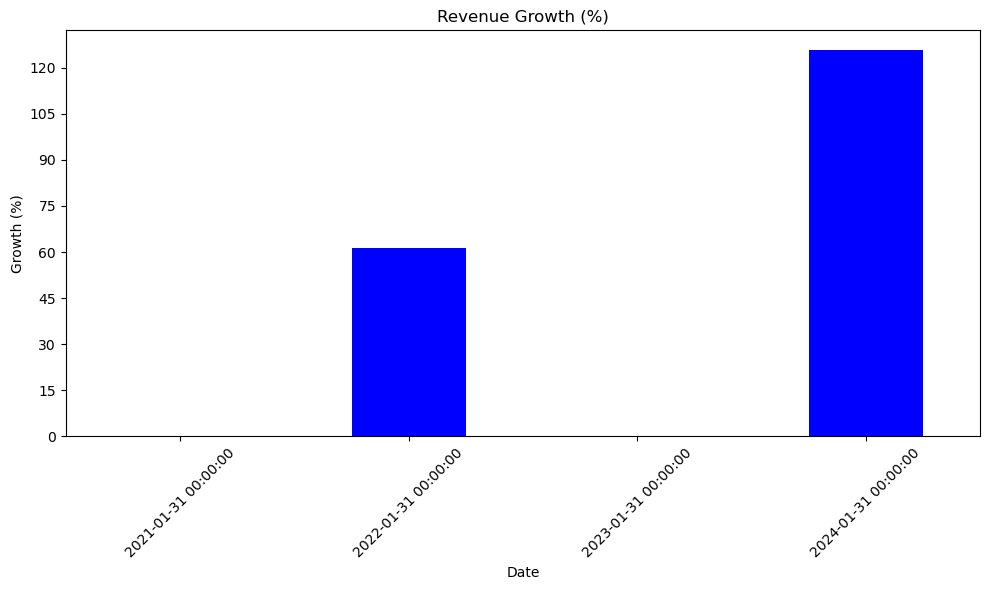

In [199]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Makes financials data numeric just in case.
financials = financials.apply(pd.to_numeric, errors='coerce')

# Calculates Revenue Growth
# Convert Total Revenue and sorts by date.
financials = financials.T  # Have dates as index.
financials = financials.sort_index()

# Calculates percentage change for Total Revenue.
financials['Total Revenue'] = financials['Total Revenue'].astype(float)
revenue_growth = financials['Total Revenue'].pct_change() * 100  # Convert to percentage

# Plot Revenue Growth.
fig, ax = plt.subplots(figsize=(10, 6))

# Bar Chart
revenue_growth.plot(kind='bar', ax=ax, title='Revenue Growth (%)', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Growth (%)')
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure y-axis shows whole numbers
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


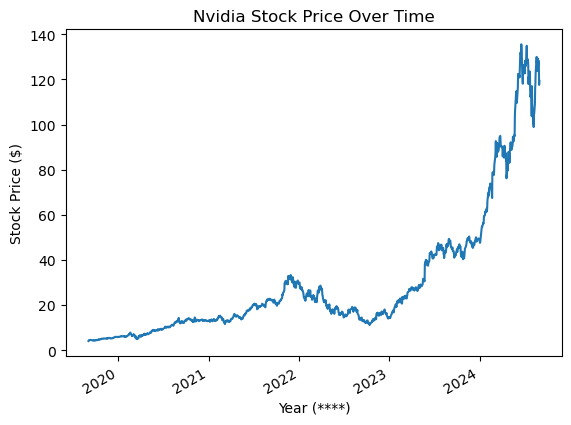

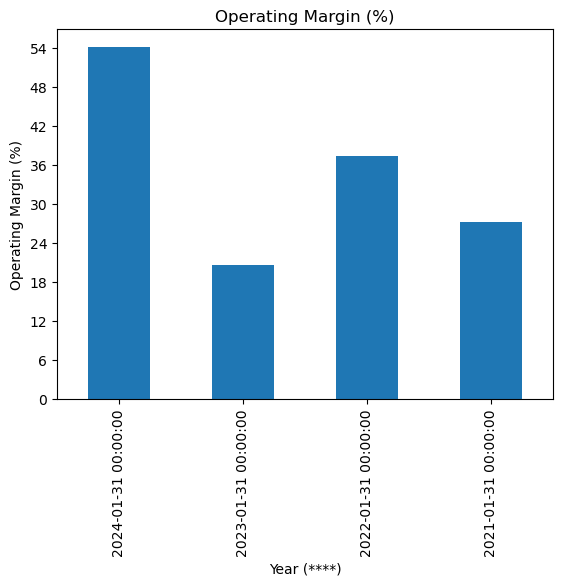

In [180]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Downloads financial data for Nvidia.
nvidia = yf.Ticker("NVDA")
hist = nvidia.history(period="5y")
financials = nvidia.financials

# Plot stock performance
hist['Close'].plot(title='Nvidia Stock Price Over Time')
plt.xlabel('Year (****)')
plt.ylabel('Stock Price ($)')
plt.show()


# Operating margin = operating income / revenue
operating_margin = (financials.loc['Operating Income'] / financials.loc['Total Revenue']) * 100

operating_margin.plot(kind='bar', title='Operating Margin (%)')
plt.xlabel('Year (****)')
plt.ylabel('Operating Margin (%)')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()



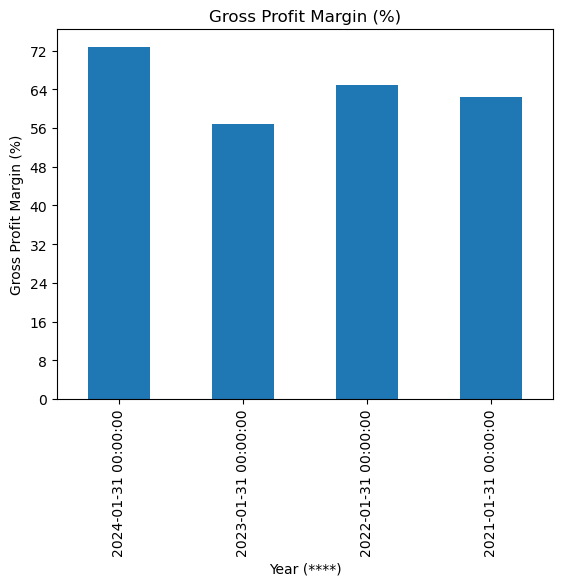

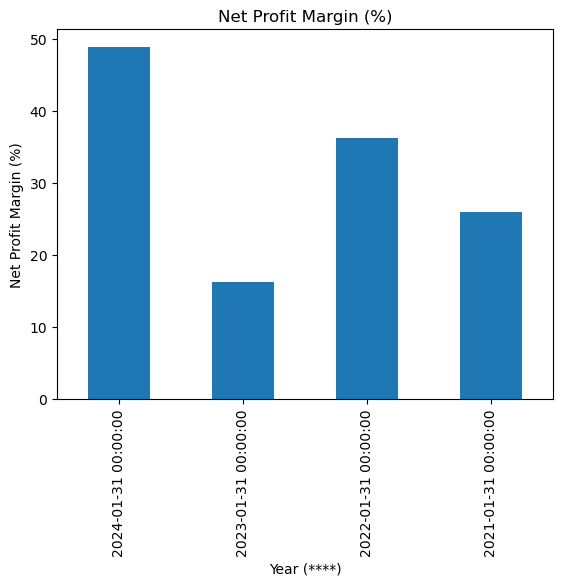

In [182]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

gross_profit_margin = (financials.loc['Gross Profit'] / financials.loc['Total Revenue']) * 100

gross_profit_margin.plot(kind='bar', title='Gross Profit Margin (%)')
plt.xlabel('Year (****)')
plt.ylabel('Gross Profit Margin (%)')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()



net_profit_margin = financials.loc['Net Income'] / financials.loc['Total Revenue'] * 100

net_profit_margin.plot(kind='bar', title='Net Profit Margin (%)')
plt.xlabel('Year (****)')
plt.ylabel('Net Profit Margin (%)')
plt.show()

## Time Series Analysis ⏳

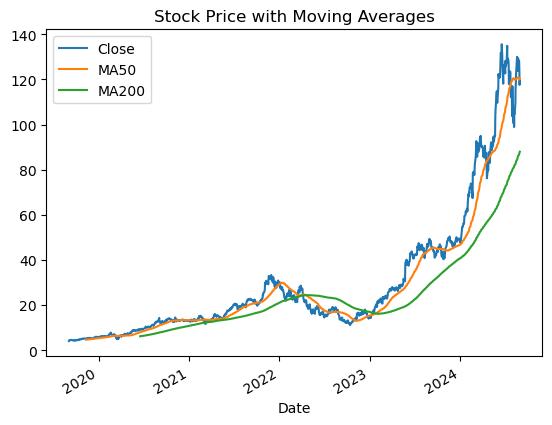

In [201]:
# Moving averages is the avaerage closing price over a time period.
# MA50 represents 50 days while MA200 is 200 days.

# Calculate moving averages.
hist['MA50'] = hist['Close'].rolling(window=50).mean()
hist['MA200'] = hist['Close'].rolling(window=200).mean()

# Plot moving averages.
hist[['Close', 'MA50', 'MA200']].plot(title='Stock Price with Moving Averages')
plt.show()


# Summary Report :p

In this analysis of Nvidia Inc., we observed an extreme increase in revenue growth and stock price over the past 5 years. The operating margin conveys an extremely healthy ratio between operating income and revenue. The gross profits are high as well with the net profits showing how much the company is taking in annually. 
Finally, the times series analysis suggests an upward trend in stock performance with the stock being "in the green" most of the time. According to this data and news, the success of Nvidia is due to increased demand for better graphics in gaming, chips in electric vehicles, and most of all, AI computing demand. 
